In [1]:
# import dependencies
import pandas as pd
import sqlite3
from datetime import datetime, timedelta


In [2]:
# Create your connections with indoor and outdoor databases
Ocnx = sqlite3.connect('Outdoor.db')
Icnx = sqlite3.connect('Indoor.db')
Outdoor_df = pd.read_sql_query("SELECT * FROM BME_DATA", Ocnx)
Indoor_df = pd.read_sql_query("SELECT * FROM BME_DATA", Icnx)

In [3]:
# Convert time into datetime
Outdoor_df['TIME_STAMP'] = pd.to_datetime(Outdoor_df['TIME_STAMP'])
Indoor_df['TIME_STAMP'] = pd.to_datetime(Indoor_df['TIME_STAMP'])

In [4]:
Outdoor_df['TIME_STAMP'] = Outdoor_df['TIME_STAMP'].dt.round('1min')
Indoor_df['TIME_STAMP'] = Indoor_df['TIME_STAMP'].dt.round('1min')

In [5]:
# Deleting the wrong input at the first rows
Outdoor_df = Outdoor_df.iloc[1:]
Indoor_df = Indoor_df.iloc[1:]

In [6]:
# converting temperature from C to f
Outdoor_df['TEMPERATURE'] = round((Outdoor_df['TEMPERATURE']* 9/5) + 32)
Indoor_df['TEMPERATURE'] = round((Indoor_df['TEMPERATURE']* 9/5) + 32)

In [7]:
Outdoor_df.head()

,id,TIME_STAMP,TEMPERATURE,GAS,HUMIDITY,PRESSURE,ALTITUDE
1,2,2019-05-12 18:58:00,75.0,364884,84.9,975.0,323.2
2,3,2019-05-12 18:59:00,75.0,362475,84.6,975.0,323.3
3,4,2019-05-12 19:00:00,75.0,362874,84.2,975.0,323.4
4,5,2019-05-12 19:01:00,75.0,362475,84.4,975.0,323.5
5,6,2019-05-12 19:02:00,75.0,362874,84.4,975.0,323.5


In [8]:
Indoor_df.head()

,id,TIME_STAMP,TEMPERATURE,GAS,HUMIDITY,PRESSURE,ALTITUDE
1,2,2019-05-12 18:58:00,74.0,6049661,35.9,972.9,341.2
2,3,2019-05-12 18:59:00,74.0,5851528,35.9,972.9,341.3
3,4,2019-05-12 19:00:00,74.0,5636172,36.2,972.9,341.4
4,5,2019-05-12 19:01:00,74.0,5441624,37.3,972.9,341.5
5,6,2019-05-12 19:02:00,74.0,5219085,37.1,972.9,341.6


In [9]:
# Merging Indor and Outdoor (on time stamp)
master_df = pd.merge(Outdoor_df, Indoor_df, on = "TIME_STAMP", how = "left", suffixes=("_Out","_In"))

In [10]:
master_df.head()

,id_Out,TIME_STAMP,TEMPERATURE_Out,GAS_Out,HUMIDITY_Out,PRESSURE_Out,ALTITUDE_Out,id_In,TEMPERATURE_In,GAS_In,HUMIDITY_In,PRESSURE_In,ALTITUDE_In
0,2,2019-05-12 18:58:00,75.0,364884,84.9,975.0,323.2,2.0,74.0,6049661.0,35.9,972.9,341.2
1,3,2019-05-12 18:59:00,75.0,362475,84.6,975.0,323.3,3.0,74.0,5851528.0,35.9,972.9,341.3
2,4,2019-05-12 19:00:00,75.0,362874,84.2,975.0,323.4,4.0,74.0,5636172.0,36.2,972.9,341.4
3,5,2019-05-12 19:01:00,75.0,362475,84.4,975.0,323.5,5.0,74.0,5441624.0,37.3,972.9,341.5
4,6,2019-05-12 19:02:00,75.0,362874,84.4,975.0,323.5,6.0,74.0,5219085.0,37.1,972.9,341.6


In [11]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [12]:
dataset = pd.read_csv('merged.csv')

In [13]:
dataset.head()

,Unnamed: 0,id_Out,TIME_STAMP,TEMPERATURE_Out,GAS_Out,HUMIDITY_Out,PRESSURE_Out,ALTITUDE_Out,id_In,TEMPERATURE_In,GAS_In,HUMIDITY_In,PRESSURE_In,ALTITUDE_In
0,0,2,2019-05-12 18:58:00,75.0,364884,84.9,975.0,323.2,2.0,74.0,6049661.0,35.9,972.9,341.2
1,1,3,2019-05-12 18:59:00,75.0,362475,84.6,975.0,323.3,3.0,74.0,5851528.0,35.9,972.9,341.3
2,2,4,2019-05-12 19:00:00,75.0,362874,84.2,975.0,323.4,4.0,74.0,5636172.0,36.2,972.9,341.4
3,3,5,2019-05-12 19:01:00,75.0,362475,84.4,975.0,323.5,5.0,74.0,5441624.0,37.3,972.9,341.5
4,4,6,2019-05-12 19:02:00,75.0,362874,84.4,975.0,323.5,6.0,74.0,5219085.0,37.1,972.9,341.6


In [14]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2620 entries, 0 to 2619
Data columns (total 14 columns):
Unnamed: 0         2620 non-null int64
id_Out             2620 non-null int64
TIME_STAMP         2620 non-null object
TEMPERATURE_Out    2620 non-null float64
GAS_Out            2620 non-null int64
HUMIDITY_Out       2620 non-null float64
PRESSURE_Out       2620 non-null float64
ALTITUDE_Out       2620 non-null float64
id_In              2615 non-null float64
TEMPERATURE_In     2615 non-null float64
GAS_In             2615 non-null float64
HUMIDITY_In        2615 non-null float64
PRESSURE_In        2615 non-null float64
ALTITUDE_In        2615 non-null float64
dtypes: float64(10), int64(3), object(1)
memory usage: 286.6+ KB


In [15]:
dataset.shape

(2620, 14)

In [16]:
dataset.describe()

,Unnamed: 0,id_Out,TEMPERATURE_Out,GAS_Out,HUMIDITY_Out,PRESSURE_Out,ALTITUDE_Out,id_In,TEMPERATURE_In,GAS_In,HUMIDITY_In,PRESSURE_In,ALTITUDE_In
count,2620.000000,2620.000000,2620.000000,2.620000e+03,2620.000000,2620.000000,2620.000000,2615.000000,2615.000000,2.615000e+03,2615.000000,2615.000000,2615.000000
mean,1309.500000,1311.500000,66.348092,6.976732e+05,72.519656,980.057099,280.129008,1311.865774,74.590057,8.871252e+05,45.770822,978.017055,297.578776
std,756.473176,756.473176,6.044462,2.562050e+05,14.928144,2.610396,22.344217,756.616522,1.143917,4.780642e+05,3.895151,2.653506,22.747484
min,0.000000,2.000000,54.000000,1.792250e+05,46.400000,974.900000,241.700000,2.000000,73.000000,7.239330e+05,35.000000,972.800000,260.500000
25%,654.750000,656.750000,63.000000,7.239330e+05,57.600000,977.800000,263.200000,657.500000,74.000000,7.239330e+05,43.300000,975.600000,280.200000
50%,1309.500000,1311.500000,68.000000,7.239330e+05,75.100000,979.900000,281.600000,1312.000000,74.000000,7.239330e+05,45.700000,977.900000,298.500000
75%,1964.250000,1966.250000,71.000000,7.239330e+05,86.700000,982.000000,299.375000,1966.500000,76.000000,7.239330e+05,47.500000,980.000000,318.050000
max,2619.000000,2621.000000,75.000000,1.512415e+06,93.800000,984.600000,323.900000,2622.000000,77.000000,6.049661e+06,63.100000,982.400000,342.400000


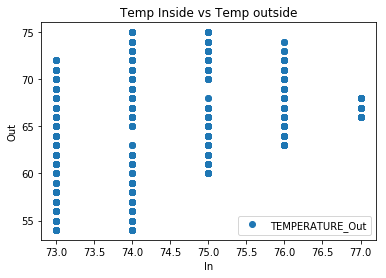

In [17]:
dataset.plot(x='TEMPERATURE_In', y='TEMPERATURE_Out', style='o')  
plt.title('Temp Inside vs Temp outside')  
plt.xlabel('In')  
plt.ylabel('Out')  
plt.show()

/Users/saraheshelden/miniconda3/envs/PythonData/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


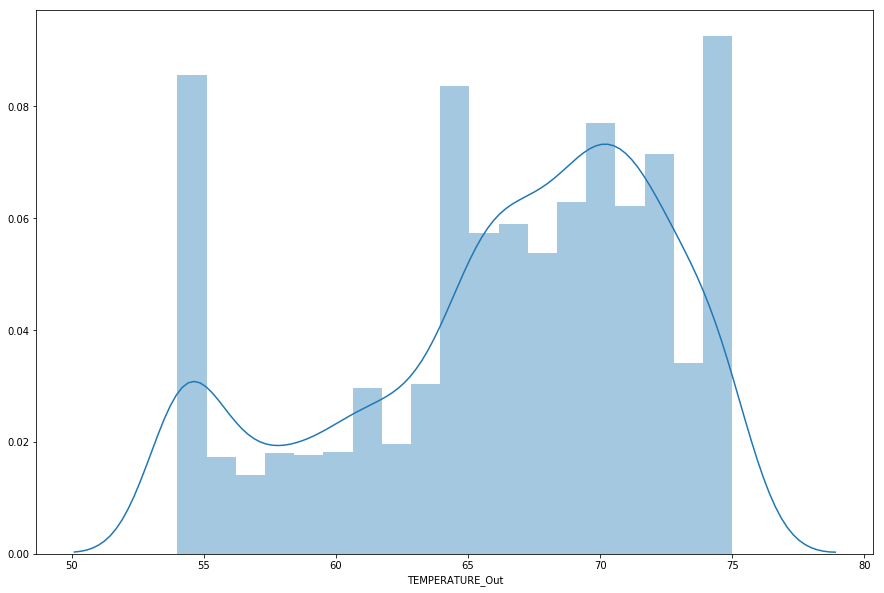

In [18]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(dataset['TEMPERATURE_Out'])

In [19]:
#clean data part 2

cleaned_data = dataset.dropna()

cleaned_data.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 2615 entries, 0 to 2619
Data columns (total 14 columns):
Unnamed: 0         2615 non-null int64
id_Out             2615 non-null int64
TIME_STAMP         2615 non-null object
TEMPERATURE_Out    2615 non-null float64
GAS_Out            2615 non-null int64
HUMIDITY_Out       2615 non-null float64
PRESSURE_Out       2615 non-null float64
ALTITUDE_Out       2615 non-null float64
id_In              2615 non-null float64
TEMPERATURE_In     2615 non-null float64
GAS_In             2615 non-null float64
HUMIDITY_In        2615 non-null float64
PRESSURE_In        2615 non-null float64
ALTITUDE_In        2615 non-null float64
dtypes: float64(10), int64(3), object(1)
memory usage: 306.4+ KB


In [20]:
#defining x and y
X = cleaned_data['TEMPERATURE_Out'].values.reshape(-1,1)
y = cleaned_data['TEMPERATURE_In'].values.reshape(-1,1)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [22]:
#training the algorithm
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

[71.24777433]
[[0.05036479]]


In [24]:
y_pred = regressor.predict(X_test)

In [25]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,74.0,74.924404
1,75.0,74.874040
2,75.0,74.420756
3,74.0,73.967473
4,73.0,74.823675
5,73.0,74.471121
6,73.0,74.622216
7,77.0,74.622216
8,74.0,74.974769
9,74.0,74.722945


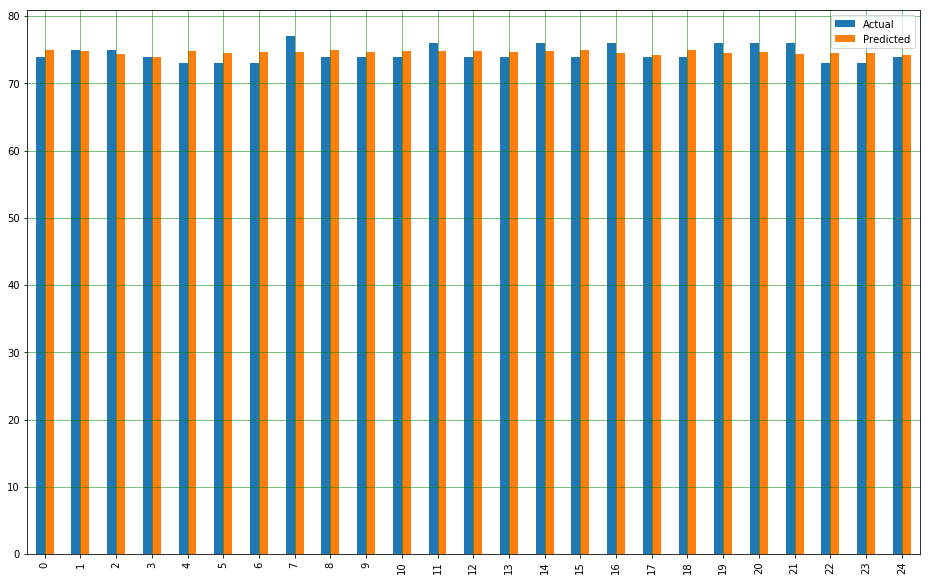

In [26]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

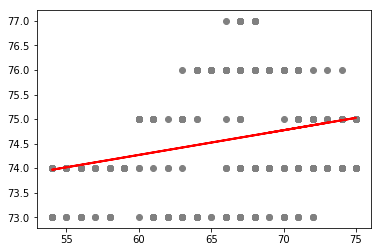

In [27]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

In [28]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.9381151650392121
Mean Squared Error: 1.2231038919312756
Root Mean Squared Error: 1.105940275029025


In [29]:
#multiple linear regression
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [30]:
dataset = pd.read_csv('merged.csv')


In [31]:
dataset.shape

(2620, 14)

In [32]:
dataset.describe()

,Unnamed: 0,id_Out,TEMPERATURE_Out,GAS_Out,HUMIDITY_Out,PRESSURE_Out,ALTITUDE_Out,id_In,TEMPERATURE_In,GAS_In,HUMIDITY_In,PRESSURE_In,ALTITUDE_In
count,2620.000000,2620.000000,2620.000000,2.620000e+03,2620.000000,2620.000000,2620.000000,2615.000000,2615.000000,2.615000e+03,2615.000000,2615.000000,2615.000000
mean,1309.500000,1311.500000,66.348092,6.976732e+05,72.519656,980.057099,280.129008,1311.865774,74.590057,8.871252e+05,45.770822,978.017055,297.578776
std,756.473176,756.473176,6.044462,2.562050e+05,14.928144,2.610396,22.344217,756.616522,1.143917,4.780642e+05,3.895151,2.653506,22.747484
min,0.000000,2.000000,54.000000,1.792250e+05,46.400000,974.900000,241.700000,2.000000,73.000000,7.239330e+05,35.000000,972.800000,260.500000
25%,654.750000,656.750000,63.000000,7.239330e+05,57.600000,977.800000,263.200000,657.500000,74.000000,7.239330e+05,43.300000,975.600000,280.200000
50%,1309.500000,1311.500000,68.000000,7.239330e+05,75.100000,979.900000,281.600000,1312.000000,74.000000,7.239330e+05,45.700000,977.900000,298.500000
75%,1964.250000,1966.250000,71.000000,7.239330e+05,86.700000,982.000000,299.375000,1966.500000,76.000000,7.239330e+05,47.500000,980.000000,318.050000
max,2619.000000,2621.000000,75.000000,1.512415e+06,93.800000,984.600000,323.900000,2622.000000,77.000000,6.049661e+06,63.100000,982.400000,342.400000


In [33]:
dataset.isnull().any()

Unnamed: 0         False
id_Out             False
TIME_STAMP         False
TEMPERATURE_Out    False
GAS_Out            False
HUMIDITY_Out       False
PRESSURE_Out       False
ALTITUDE_Out       False
id_In               True
TEMPERATURE_In      True
GAS_In              True
HUMIDITY_In         True
PRESSURE_In         True
ALTITUDE_In         True
dtype: bool

In [39]:
dataset = dataset.fillna(method='ffill')

In [42]:
X = dataset[['TEMPERATURE_Out', 'GAS_Out', 'PRESSURE_Out']].values
# y = dataset['TEMPERATURE_In','GAS_In'].values